In [1]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
x,y = mglearn.datasets.make_wave()

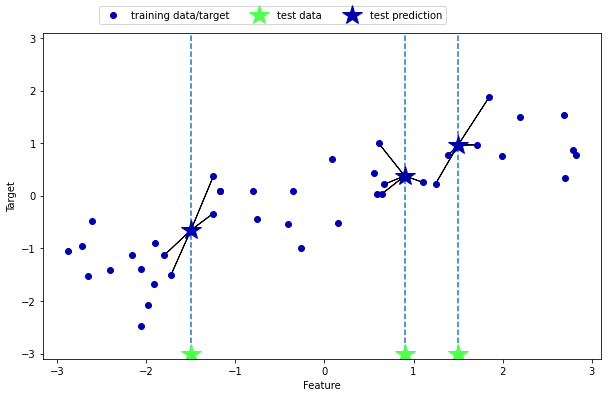

In [3]:
# example of how things work
mglearn.plots.plot_knn_regression(n_neighbors=4)

In [4]:
x_train, x_test = train_test_split(x, random_state=0)
y_train, y_test = train_test_split(y, random_state=0)

In [5]:
from sklearn.neighbors import KNeighborsRegressor
neigh_settings = range(1,11)
test_acc = []
train_acc = []
for neigh in neigh_settings:
    reg = KNeighborsRegressor(n_neighbors=neigh)
    reg.fit(x_train,y_train)
    train_acc.append(reg.score(x_train,y_train))
    test_acc.append(reg.score(x_test,y_test))

In [6]:
print(test_acc)
print(train_acc)

[0.61919257050849, 0.6102168666870019, 0.6706208209942042, 0.7472016863966215, 0.7501149638643652, 0.7458994988112149, 0.7333625407973601, 0.72998389155743, 0.7584567561890965, 0.760511108406636]
[1.0, 0.896429318140582, 0.8430467596104142, 0.8138170155427406, 0.792760799126194, 0.7808844865065582, 0.7640046529692128, 0.7313184765149046, 0.7290835036505356, 0.7294025976290452]


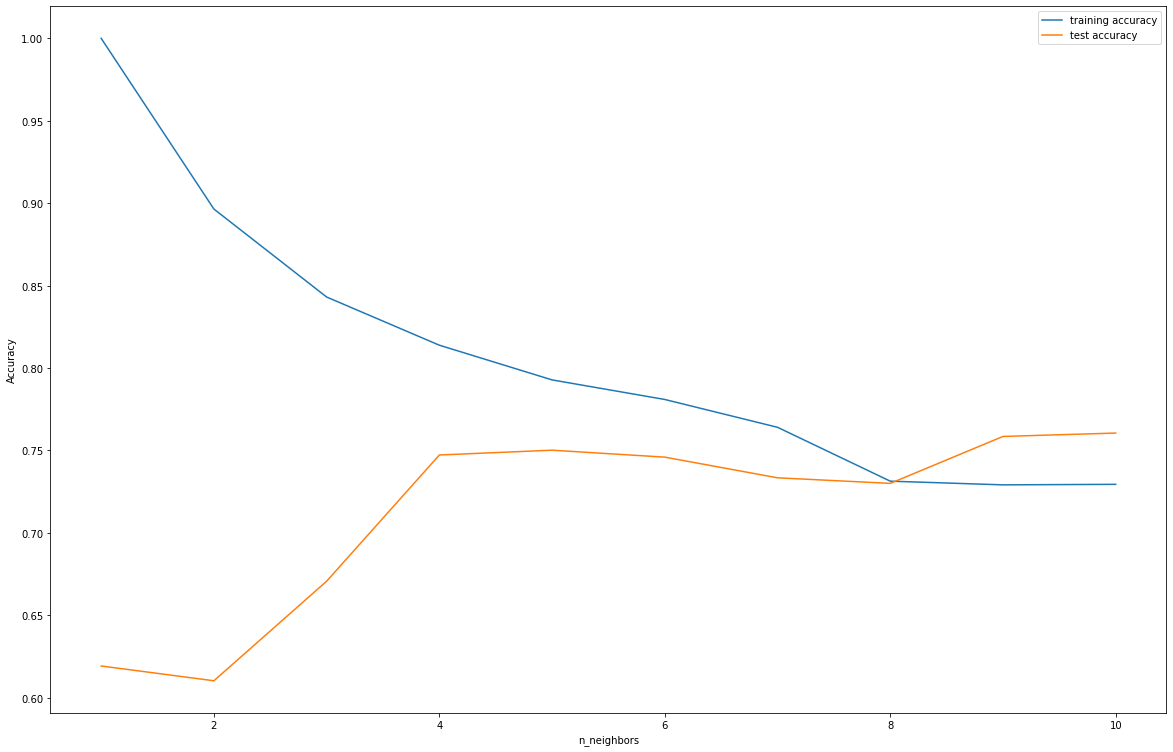

In [7]:
plt.figure(figsize=(20,13))
plt.plot(neigh_settings, train_acc, label="training accuracy")
plt.plot(neigh_settings, test_acc, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [1]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

w[0]: 0.393906  b: -0.031804


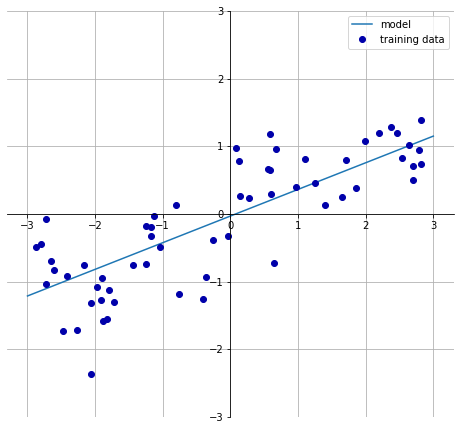

In [8]:
mglearn.plots.plot_linear_regression_wave()

In [2]:
from sklearn.linear_model import LinearRegression
x,y = mglearn.datasets.make_wave(n_samples=60)
x_train,x_test = train_test_split(x, random_state=60)
y_train,y_test = train_test_split(y, random_state=60)

In [5]:
lr = LinearRegression().fit(x_train,y_train)

In [7]:
print(lr.coef_,lr.intercept_)

[0.39657699] -0.045600364243923205


In [8]:
print(lr.score(x_train,y_train))
print(lr.score(x_test,y_test))

0.6307769935409304
0.7673950193522181


# Binning

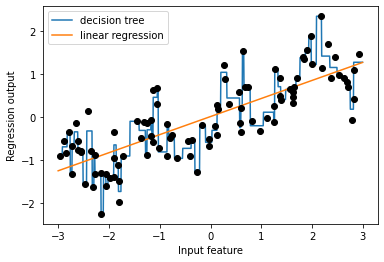

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
x, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
reg = DecisionTreeRegressor(min_samples_split=3).fit(x, y)
plt.plot(line, reg.predict(line), label="decision tree")
reg = LinearRegression().fit(x, y)
plt.plot(line, reg.predict(line), label="linear regression")
plt.plot(x[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

In [3]:
bins = np.linspace(-3,3,11)
which_bin = np.digitize(x, bins=bins)

In [4]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False).fit(which_bin)
melted = enc.transform(which_bin)
print(melted[:10])
enc.get_feature_names_out()

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


array(['x0_1', 'x0_2', 'x0_3', 'x0_4', 'x0_5', 'x0_6', 'x0_7', 'x0_8',
       'x0_9', 'x0_10'], dtype=object)

Text(0.5, 0, 'Input feature')

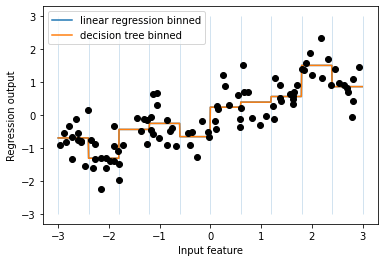

In [5]:
line_binned = enc.transform(np.digitize(line, bins=bins))
reg = LinearRegression().fit(melted, y)
plt.plot(line, reg.predict(line_binned), label='linear regression binned')
reg = DecisionTreeRegressor(min_samples_split=3).fit(melted, y)
plt.plot(line, reg.predict(line_binned), label='decision tree binned')
plt.plot(x[:, 0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")

In [6]:
x_combined = np.hstack([x, melted])
x_combined.shape

(100, 11)

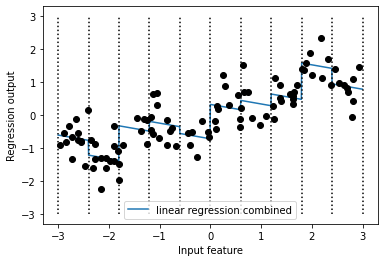

In [7]:
reg = LinearRegression().fit(x_combined, y)
line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='linear regression combined')
for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.plot(x[:, 0], y, 'o', c='k')

In [8]:
x_product = np.hstack([melted, melted*x])
x_product.shape

(100, 20)

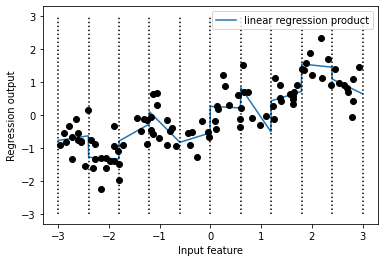

In [9]:
reg = LinearRegression().fit(x_product, y)
line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='linear regression product')
for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.plot(x[:, 0], y, 'o', c='k')

# Poly

In [3]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=10, include_bias=False).fit(x)
x_poly = poly.transform(x)
x_poly.shape

(100, 10)

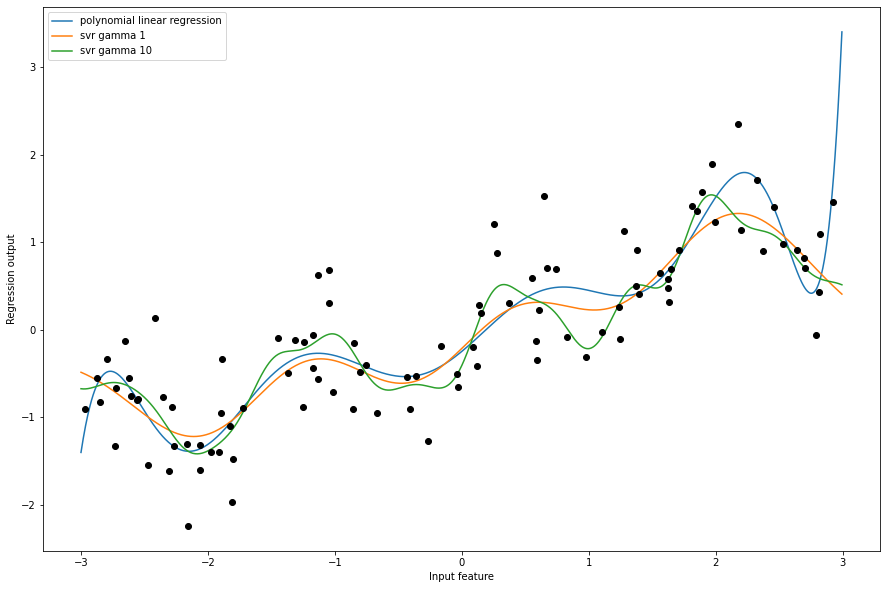

In [17]:
reg = LinearRegression().fit(x_poly, y)
line_poly = poly.transform(line)
plt.figure(figsize=(15,10))
plt.plot(line, reg.predict(line_poly), label='polynomial linear regression')

from sklearn.svm import SVR
for gamma in [1,10]:
    svr = SVR(gamma=gamma).fit(x,y)
    plt.plot(line, svr.predict(line), label='svr gamma {}'.format(gamma))

plt.plot(x[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")